### Introdução
Ozeas dos Santos Nascimento

O objetivo dessa trabalho é classificar pessoas pela sua propensão a comprar um novo leitor digital (eReader), de modo a melhorar a efetividade de campanhas de marketing.
Para alcançar este objetivo, utilizarei o modelo de árvores de decisão para minerar hábitos de consumo de usuários de um site de e-commerce. O sociólogo Everett Rogers publicou, na década de 60, um trabalho que mostrava a adoção de novas tecnologias por consumidores. Ele identificou os seguintes grupos de consumidores: inovators, early adopters, early majority e late majority. Os dois primeiros grupos compreendem os usuários mais propensos a comprar uma nova tecnologia, enquanto os dois últimos eventualmente poderão comprar a tecnologia, se achar conveniente.

Dataset Atividade 3 - Bases.xlsx

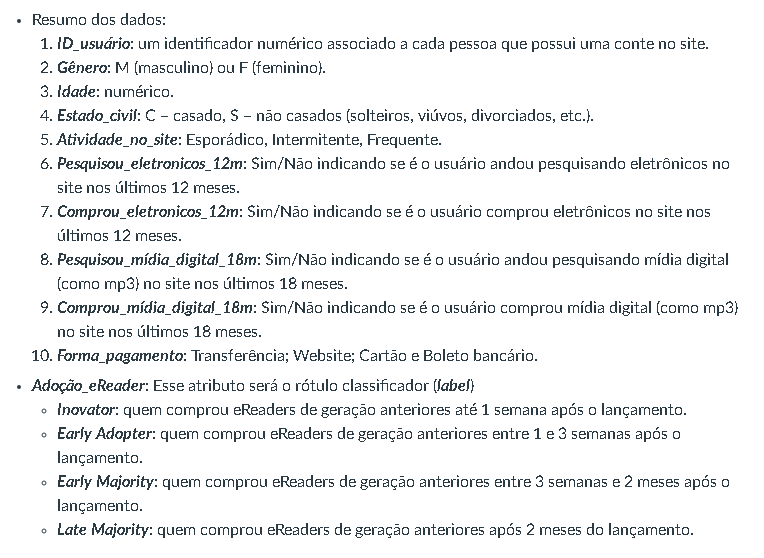

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

## Carregamento e comparação dos dados 

In [2]:
df_trein = pd.read_excel("Base_clientes.xlsx", sheet_name = "TREINAMENTO")
df_valid = pd.read_excel("Base_clientes.xlsx", sheet_name = "VALIDAÇÃO")

In [3]:
df_trein.head(4)

,ID_usuário,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,9552,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,6757,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,3599,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter
3,6811,M,49,C,Esporádico,Sim,Sim,Sim,Sim,Website,Early Adopter


In [4]:
df_valid.head(4)

,ID_usuário,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,56031,M,57,S,Intermitente,Sim,Sim,Sim,Sim,Transferência
1,25913,F,51,C,Intermitente,Sim,Sim,Não,Não,Transferência
2,19396,M,41,C,Esporádico,Sim,Sim,Sim,Não,Website
3,93666,M,66,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito


In [5]:
df_trein.info(), df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID_usuário                   661 non-null    int64 
 1   Gênero                       661 non-null    object
 2   Idade                        661 non-null    int64 
 3   Estado_civil                 661 non-null    object
 4   Atividade_no_site            661 non-null    object
 5   Pesquisou_eletronicos_12m    661 non-null    object
 6   Comprou_eletronicos_12m      661 non-null    object
 7   Pesquisou_mídia_digital_18m  661 non-null    object
 8   Comprou_mídia_digital_18m    661 non-null    object
 9   Forma_pagamento              661 non-null    object
 10  Adoção_eReader               661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns)

(None, None)

In [6]:
df_trein.shape, df_valid.shape # linhas, colunas tabela TREINAMENTO // VALIDAÇÃO

((661, 11), (473, 10))

In [7]:
df_trein.columns, df_valid.columns

(Index(['ID_usuário', 'Gênero', 'Idade', 'Estado_civil', 'Atividade_no_site',
        'Pesquisou_eletronicos_12m', 'Comprou_eletronicos_12m',
        'Pesquisou_mídia_digital_18m', 'Comprou_mídia_digital_18m',
        'Forma_pagamento', 'Adoção_eReader'],
       dtype='object'),
 Index(['ID_usuário', 'Gênero', 'Idade', 'Estado_civil', 'Atividade_no_site',
        'Pesquisou_eletronicos_12m', 'Comprou_eletronicos_12m',
        'Pesquisou_mídia_digital_18m', 'Comprou_mídia_digital_18m',
        'Forma_pagamento'],
       dtype='object'))

### ESTATÍSTICA DESCRITIVA DOS DADOS
(apenas os campos numéricos)

In [8]:
df_trein["Idade"].describe()

count    661.000000
mean      42.794251
std       13.861983
min       16.000000
25%       32.000000
50%       44.000000
75%       55.000000
max       66.000000
Name: Idade, dtype: float64

In [9]:
df_valid["Idade"].describe()

count    473.000000
mean      45.972516
std       13.385313
min       17.000000
25%       35.000000
50%       47.000000
75%       56.000000
max       70.000000
Name: Idade, dtype: float64

In [10]:
# Para se ter uma visão dos atributos categóricos, os atributos não numéricos são descartados. 
df_trein.select_dtypes(include='object').describe()

,Gênero,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
count,661,661,661,661,661,661,661,661,661
unique,2,2,3,2,2,2,2,4,4
top,M,C,Esporádico,Sim,Sim,Sim,Não,Website,Early Adopter
freq,346,381,424,613,339,525,364,235,205


In [11]:
df_valid.select_dtypes(include='object').describe()

,Gênero,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
count,473,473,473,473,473,473,473,473
unique,2,2,3,2,2,2,2,4
top,M,C,Esporádico,Sim,Não,Sim,Não,Website
freq,252,243,286,451,245,378,271,193


# Transformação de dados

### REMOÇÃO DE ATRIBUTOS IRRELEVANTES

* ```ID_usuário``` é apenas uma chave primária para identificar um usuário e não é relevante para o problema.


In [12]:
del df_trein["ID_usuário"]
del df_valid["ID_usuário"]


In [13]:
df_trein.shape, df_valid.shape

((661, 10), (473, 9))

In [14]:
df_trein.head(5)

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter
3,M,49,C,Esporádico,Sim,Sim,Sim,Sim,Website,Early Adopter
4,M,29,S,Esporádico,Sim,Sim,Sim,Não,Website,Late Majority


### TRANSFORMAÇÃO DE VARIÁVEIS
#### Converter numérico em categórico.
Não foi necessário converter a variável idade em categórico numérico. As demais foram convertidas de object para categorical.

In [15]:
df_valid["Pesquisou_eletronicos_12m"].unique(), df_valid["Comprou_eletronicos_12m"].unique(),  df_valid["Pesquisou_mídia_digital_18m"].unique(),  df_valid["Comprou_mídia_digital_18m"].unique(),  df_valid["Gênero"].unique(),  df_valid["Estado_civil"].unique(),  df_valid["Atividade_no_site"].unique(),  df_valid["Forma_pagamento"].unique()

(array(['Sim', 'Não'], dtype=object),
 array(['Sim', 'Não'], dtype=object),
 array(['Sim', 'Não'], dtype=object),
 array(['Sim', 'Não'], dtype=object),
 array(['M', 'F'], dtype=object),
 array(['S', 'C'], dtype=object),
 array(['Intermitente', 'Esporádico', 'Frequênte'], dtype=object),
 array(['Transferência', 'Website', 'Cartão de crédito', 'Boleto bancário'],
       dtype=object))

In [16]:

df_valid["Pesquisou_eletronicos_12m"] = df_valid["Pesquisou_eletronicos_12m"].astype('category')
df_valid["Comprou_eletronicos_12m"] = df_valid["Comprou_eletronicos_12m"].astype('category')
df_valid["Pesquisou_mídia_digital_18m"] = df_valid["Pesquisou_mídia_digital_18m"].astype('category')
df_valid["Comprou_mídia_digital_18m"] = df_valid["Comprou_mídia_digital_18m"].astype('category')
df_valid["Gênero"] = df_valid["Gênero"].astype('category')
df_valid["Estado_civil"] = df_valid["Estado_civil"].astype('category')
df_valid["Atividade_no_site"] = df_valid["Atividade_no_site"].astype('category')
df_valid["Forma_pagamento"] = df_valid["Forma_pagamento"].astype('category')

df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gênero                       473 non-null    category
 1   Idade                        473 non-null    int64   
 2   Estado_civil                 473 non-null    category
 3   Atividade_no_site            473 non-null    category
 4   Pesquisou_eletronicos_12m    473 non-null    category
 5   Comprou_eletronicos_12m      473 non-null    category
 6   Pesquisou_mídia_digital_18m  473 non-null    category
 7   Comprou_mídia_digital_18m    473 non-null    category
 8   Forma_pagamento              473 non-null    category
dtypes: category(8), int64(1)
memory usage: 8.6 KB


In [17]:
df_valid.select_dtypes(include='category').describe()

,Gênero,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
count,473,473,473,473,473,473,473,473
unique,2,2,3,2,2,2,2,4
top,M,C,Esporádico,Sim,Não,Sim,Não,Website
freq,252,243,286,451,245,378,271,193


In [18]:
df_valid.head(4)

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,M,57,S,Intermitente,Sim,Sim,Sim,Sim,Transferência
1,F,51,C,Intermitente,Sim,Sim,Não,Não,Transferência
2,M,41,C,Esporádico,Sim,Sim,Sim,Não,Website
3,M,66,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito


#insight

In [19]:
df_valid.groupby(["Gênero","Comprou_mídia_digital_18m"]).size().reset_index(name="Adoção_eReader")

,Gênero,Comprou_mídia_digital_18m,Adoção_eReader
0,F,Não,137
1,F,Sim,84
2,M,Não,134
3,M,Sim,118


In [20]:
df_valid.groupby(["Pesquisou_mídia_digital_18m","Comprou_mídia_digital_18m"]).size().reset_index(name="Adoção_eReader")

,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Adoção_eReader
0,Não,Não,52
1,Não,Sim,43
2,Sim,Não,219
3,Sim,Sim,159


### VALORES OMISSOS OU INCONSISTENTES

Vamos analisar o dataset para visualizar se temos algum valor omisso.

#### Detectando valores faltantes (na)

In [21]:
df_trein.isna().sum()

Gênero                         0
Idade                          0
Estado_civil                   0
Atividade_no_site              0
Pesquisou_eletronicos_12m      0
Comprou_eletronicos_12m        0
Pesquisou_mídia_digital_18m    0
Comprou_mídia_digital_18m      0
Forma_pagamento                0
Adoção_eReader                 0
dtype: int64

In [22]:
df_valid.isna().sum()

Gênero                         0
Idade                          0
Estado_civil                   0
Atividade_no_site              0
Pesquisou_eletronicos_12m      0
Comprou_eletronicos_12m        0
Pesquisou_mídia_digital_18m    0
Comprou_mídia_digital_18m      0
Forma_pagamento                0
dtype: int64

### Distribuição do atributo ```Idade```

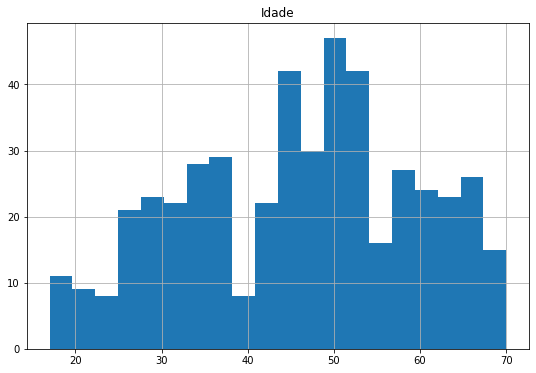

In [23]:
df_valid.hist(column='Idade',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20);        # Numero de colunas/bins do histograma

O dado possui uma distribuição próxima da distribuição Normal. Se houvessem dados faltantes, poderíamos usar a mediana para preencher-los conforme os códigos abaixo.

In [24]:
# TODO ler sobre boostrap

In [25]:
[idd for idd in df_valid["Idade"]][:10]

[57, 51, 41, 66, 31, 68, 51, 36, 29, 61]

In [26]:
[idd for idd in df_valid["Idade"] if (np.isnan(idd) == False)][:10]

[57, 51, 41, 66, 31, 68, 51, 36, 29, 61]

In [27]:
mediana = np.median([idd for idd in df_valid["Idade"] if (np.isnan(idd) == False)])
mediana

47.0

In [28]:
new_age = np.where(df_valid["Idade"].isnull(), # condição
                   mediana,                       # valor se verdadeiro
                   df_valid["Idade"])          # valor se falso
                   
df_valid["Idade"] = new_age


Análise do novo atributo Idade:
count    473.000000
mean      45.972516
std       13.385313
min       17.000000
25%       35.000000
50%       47.000000
75%       56.000000
max       70.000000
Name: Idade, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87beb02190>]],
      dtype=object)

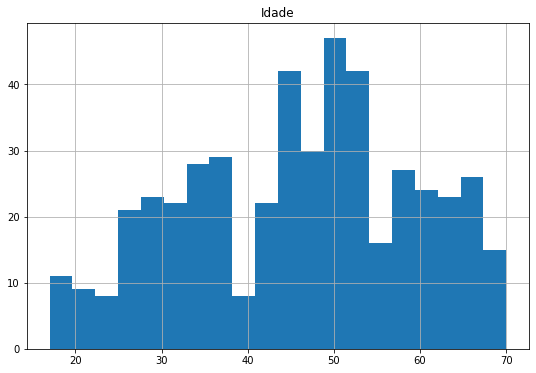

In [29]:
print("\nAnálise do novo atributo Idade:")
print(df_valid["Idade"].describe())

df_valid.hist(column='Idade',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20)         # Numero de colunas do histogram

In [30]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gênero                       473 non-null    category
 1   Idade                        473 non-null    float64 
 2   Estado_civil                 473 non-null    category
 3   Atividade_no_site            473 non-null    category
 4   Pesquisou_eletronicos_12m    473 non-null    category
 5   Comprou_eletronicos_12m      473 non-null    category
 6   Pesquisou_mídia_digital_18m  473 non-null    category
 7   Comprou_mídia_digital_18m    473 non-null    category
 8   Forma_pagamento              473 non-null    category
dtypes: category(8), float64(1)
memory usage: 8.6 KB


### DETECTANDO OUTLIERS

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

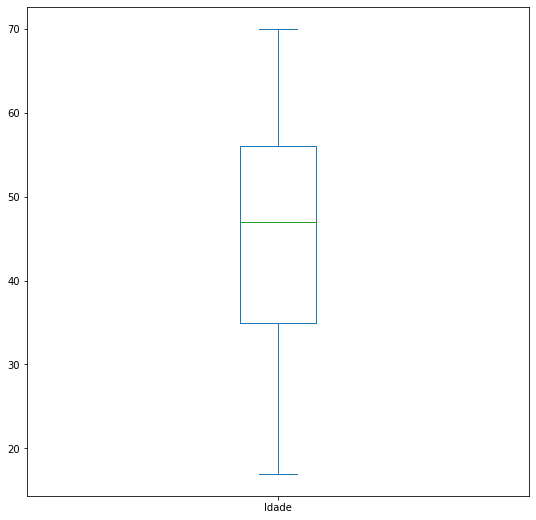

In [31]:
df_valid["Idade"].plot(kind="box", figsize=(9,9));

In [32]:
print("Registros com valores extremos:")
df_valid[df_valid["Idade"] == max(df_valid["Idade"])]

Registros com valores extremos:


,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
347,M,70.0,C,Intermitente,Sim,Sim,Sim,Não,Transferência


In [33]:
df_valid[df_valid["Idade"] < max(df_valid["Idade"])].Idade.max()

69.0

In [34]:
df_idade = df_valid[df_valid["Idade"] < max(df_valid["Idade"])]

df_idade.head()

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,M,57.0,S,Intermitente,Sim,Sim,Sim,Sim,Transferência
1,F,51.0,C,Intermitente,Sim,Sim,Não,Não,Transferência
2,M,41.0,C,Esporádico,Sim,Sim,Sim,Não,Website
3,M,66.0,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito
4,F,31.0,S,Esporádico,Sim,Não,Sim,Não,Website


In [35]:
df_valid.head(2)

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,M,57.0,S,Intermitente,Sim,Sim,Sim,Sim,Transferência
1,F,51.0,C,Intermitente,Sim,Sim,Não,Não,Transferência


In [36]:
df_trein.head(4)

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter
3,M,49,C,Esporádico,Sim,Sim,Sim,Sim,Website,Early Adopter


In [37]:
df_valid.head(4)

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,M,57.0,S,Intermitente,Sim,Sim,Sim,Sim,Transferência
1,F,51.0,C,Intermitente,Sim,Sim,Não,Não,Transferência
2,M,41.0,C,Esporádico,Sim,Sim,Sim,Não,Website
3,M,66.0,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito


# TESTE dataset: VALIDAÇÃO

In [38]:
X = df_valid.iloc[:,0:(df_valid.shape[1] - 1)].T.to_dict().values() 

vect = DictVectorizer(sparse=False) 
X = vect.fit_transform(X)


le = LabelEncoder()
y = le.fit_transform(df_valid.iloc[:,(df_valid.shape[1] - 1)])

In [39]:
X

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [40]:
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y, random_state=0, test_size=0.32)

In [41]:
valid_tree = DecisionTreeClassifier(random_state=0, criterion='gini')
valid_tree = valid_tree.fit(X_train_v, y_train_v)

In [42]:
valid_tree.predict(X_train_v)

array([3, 2, 1, 1, 2, 0, 2, 1, 2, 3, 2, 0, 2, 2, 2, 3, 0, 3, 2, 3, 3, 2,
       3, 2, 3, 0, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 1, 0, 1, 1, 3, 2, 2,
       3, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 1, 3,
       3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 2, 3, 3, 2, 3, 0, 1,
       2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 3, 3, 1, 3, 3, 2, 0, 3, 1,
       0, 2, 3, 3, 1, 1, 3, 2, 2, 0, 3, 3, 3, 3, 1, 0, 2, 2, 2, 2, 0, 3,
       0, 3, 1, 3, 1, 3, 2, 2, 3, 0, 2, 3, 2, 2, 3, 2, 0, 3, 1, 3, 1, 2,
       3, 0, 3, 2, 1, 2, 0, 3, 3, 2, 1, 2, 1, 3, 2, 2, 1, 2, 0, 3, 1, 0,
       3, 3, 3, 2, 2, 3, 0, 0, 3, 1, 0, 3, 3, 3, 1, 3, 3, 2, 3, 1, 2, 3,
       2, 2, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       1, 0, 1, 2, 2, 0, 2, 0, 3, 3, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 2, 2,
       2, 2, 3, 3, 1, 3, 3, 2, 0, 2, 1, 1, 3, 1, 3, 2, 2, 3, 2, 0, 1, 1,
       2, 3, 3, 2, 1, 3, 0, 1, 2, 3, 2, 3, 2, 1, 1, 1, 2, 3, 3, 1, 3, 3,
       0, 1, 2, 2, 2, 3, 3, 0, 2, 2, 1, 2, 2, 3, 0,

In [43]:
y_train_v

array([3, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 0, 2, 2, 2, 3, 0, 3, 2, 3, 3, 2,
       3, 2, 3, 0, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 1, 0, 1, 1, 3, 2, 2,
       2, 2, 2, 1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1,
       2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 3, 3, 1, 3, 3, 3, 0, 3, 1,
       0, 2, 3, 3, 1, 1, 3, 2, 2, 0, 3, 3, 3, 3, 1, 0, 2, 2, 2, 2, 0, 3,
       0, 3, 1, 3, 1, 3, 2, 2, 3, 0, 2, 3, 2, 2, 3, 2, 0, 3, 1, 3, 1, 2,
       3, 0, 3, 2, 1, 2, 0, 3, 3, 2, 1, 2, 1, 3, 2, 2, 1, 2, 0, 3, 1, 0,
       3, 3, 3, 2, 2, 3, 0, 0, 3, 1, 0, 3, 3, 3, 1, 3, 3, 2, 3, 1, 2, 3,
       2, 2, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       1, 0, 1, 2, 2, 0, 2, 0, 3, 3, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 2, 3,
       2, 2, 3, 3, 1, 3, 3, 2, 0, 2, 1, 1, 3, 1, 3, 2, 2, 3, 2, 0, 1, 3,
       2, 3, 3, 2, 1, 3, 0, 1, 2, 3, 2, 3, 2, 1, 1, 1, 2, 3, 3, 1, 3, 3,
       0, 1, 2, 2, 3, 3, 3, 0, 2, 2, 1, 2, 2, 3, 0,

In [44]:
print("Acurácia (base de treinamento):", valid_tree.score(X_train_v, y_train_v))  #Foi possível atingir a acurácia de 0.97% da nossa base de treinamento;

Acurácia (base de treinamento): 0.9688473520249221


In [45]:
y_pred_v = valid_tree.predict(X_test_v)
y_pred_v

array([2, 3, 3, 2, 3, 3, 3, 1, 3, 2, 3, 0, 3, 0, 2, 1, 3, 3, 3, 2, 1, 2,
       3, 3, 0, 3, 2, 0, 2, 0, 3, 1, 2, 0, 1, 0, 3, 3, 3, 2, 3, 2, 3, 1,
       2, 2, 3, 2, 3, 1, 0, 0, 3, 3, 3, 2, 3, 3, 3, 1, 3, 2, 1, 3, 1, 3,
       2, 3, 2, 0, 3, 2, 3, 3, 3, 0, 0, 2, 0, 2, 3, 2, 2, 1, 1, 0, 3, 0,
       3, 3, 2, 3, 0, 3, 2, 2, 2, 0, 3, 3, 2, 2, 3, 3, 0, 3, 3, 1, 0, 1,
       3, 1, 3, 3, 2, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 3, 1, 1, 3, 2, 2, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0])

In [46]:
y_test_v

array([2, 3, 3, 2, 3, 3, 0, 1, 0, 2, 3, 2, 3, 0, 2, 1, 2, 0, 3, 2, 1, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 0, 3, 2, 3, 3, 0, 2, 3, 2, 3, 3,
       3, 2, 3, 2, 3, 1, 0, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3,
       2, 3, 3, 0, 0, 2, 3, 3, 3, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 3, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 2, 2, 3, 3, 2, 3, 0, 3, 2, 1,
       3, 1, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2,
       2, 2, 3, 3, 1, 3, 0, 2, 3, 1, 3, 0, 2, 3, 2, 2, 3, 2, 3, 1])

In [47]:
print("Acurácia de previsão:", accuracy_score(y_test_v, y_pred_v))  #Em nossa Previsão, atingimos a acurácia de 0.72% dos valores; Temos a sendo possivel identificar o overfitting;

Acurácia de previsão: 0.7171052631578947


In [48]:
cnf_matrix = confusion_matrix(y_test_v, y_pred_v)
print(cnf_matrix)

[[12  1  0  9]
 [ 1  9  0  0]
 [ 7  4 34  9]
 [ 2  4  6 54]]


## Para o dataset Validação, Não temos como seguir com a comparação

# TESTE E ARVORE DATASET TREINO

In [ ]:
#Selecionar todas colunas exceto a classe
X_dict = df_trein.iloc[:,df_trein.columns != 'Adoção_eReader'].T.to_dict().values()


# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

In [50]:
# Transformar as variáveis categóricas

vect = DictVectorizer(sparse=False) 
X_train = vect.fit_transform(X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento apos binarizacao: {0}".format(X_train.shape))
X_train


Shape do dado de treinamento apos binarizacao: (661, 20)


array([[1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [51]:
vect.feature_names_ #Nome dos atributos

['Atividade_no_site=Esporádico',
 'Atividade_no_site=Frequênte',
 'Atividade_no_site=Intermitente',
 'Comprou_eletronicos_12m=Não',
 'Comprou_eletronicos_12m=Sim',
 'Comprou_mídia_digital_18m=Não',
 'Comprou_mídia_digital_18m=Sim',
 'Estado_civil=C',
 'Estado_civil=S',
 'Forma_pagamento=Boleto bancário',
 'Forma_pagamento=Cartão de crédito',
 'Forma_pagamento=Transferência',
 'Forma_pagamento=Website',
 'Gênero=F',
 'Gênero=M',
 'Idade',
 'Pesquisou_eletronicos_12m=Não',
 'Pesquisou_eletronicos_12m=Sim',
 'Pesquisou_mídia_digital_18m=Não',
 'Pesquisou_mídia_digital_18m=Sim']

In [52]:
df_trein.head(3)

,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter


In [53]:
le = LabelEncoder()
y_train = le.fit_transform(df_trein["Adoção_eReader"])


print("Labels:", y_train)

Labels: [3 2 0 0 3 1 0 3 2 1 2 0 3 2 2 3 0 0 1 3 0 1 3 3 3 2 0 0 3 0 0 1 1 1 3 2 1
 3 2 3 0 3 1 3 2 3 0 3 3 0 3 0 0 0 0 3 1 1 1 2 0 0 0 0 3 0 1 1 0 0 0 3 1 3
 1 1 1 3 1 0 3 1 2 0 3 0 1 0 0 3 1 0 3 2 2 0 1 3 2 0 1 0 1 1 1 0 2 2 0 1 1
 1 1 1 2 1 1 1 3 0 1 0 1 2 1 0 0 2 3 2 2 0 0 1 2 1 0 0 1 3 3 1 0 2 0 1 0 1
 1 3 2 1 1 3 2 3 1 2 1 0 0 1 1 1 2 3 1 0 2 0 0 0 3 3 3 0 0 3 2 1 1 1 1 1 1
 3 3 3 3 0 0 0 0 1 3 3 3 1 0 0 0 0 0 0 0 1 1 0 3 3 1 2 1 1 0 0 3 3 2 1 3 3
 3 3 0 1 1 3 0 2 3 0 2 2 0 3 0 3 2 2 0 1 3 2 1 3 2 0 3 0 0 3 0 3 2 3 1 0 1
 0 1 0 2 2 1 3 2 1 0 1 0 0 0 0 1 2 0 1 2 0 1 2 0 1 3 0 2 1 2 2 1 0 0 1 0 2
 2 0 0 0 2 3 3 1 1 1 3 0 1 1 0 0 3 1 3 1 2 1 0 2 2 3 3 3 3 3 0 0 0 0 3 3 3
 0 0 1 0 1 3 0 0 3 3 1 1 0 0 3 1 2 0 0 1 3 2 2 0 3 3 3 0 2 0 0 2 3 1 1 3 3
 3 3 3 2 0 0 3 1 1 3 1 0 3 3 1 0 1 0 1 0 3 3 0 3 1 0 1 0 0 3 2 0 1 3 3 1 1
 1 0 3 3 0 3 0 2 0 0 1 0 0 2 2 3 2 3 1 0 0 1 1 3 3 3 1 1 1 3 0 3 0 3 1 0 0
 2 0 1 1 2 3 0 0 1 2 2 1 0 2 3 1 0 0 1 1 2 1 0 1 0 2 1 2 0 3 3 3 0 3 2 0 3
 1 1 3 1 1 3 2 0 

In [54]:
le.classes_

array(['Early Adopter', 'Early Majority', 'Innovator', 'Late Majority'],
      dtype=object)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=445, test_size=0.10)

## Indução do Modelo




In [56]:
treeConsumer = DecisionTreeClassifier(random_state=655, criterion='entropy')

treeConsumer = treeConsumer.fit(X_train, y_train)
treeConsumer

DecisionTreeClassifier(criterion='entropy', random_state=655)

In [57]:
treeConsumer.predict(X_train)

array([3, 0, 0, 1, 0, 3, 0, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0, 3, 0, 2, 0, 0,
       1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 3, 2, 0, 0, 1, 3, 1, 2, 2, 2,
       0, 1, 3, 1, 1, 1, 1, 0, 2, 3, 0, 3, 1, 0, 3, 0, 0, 1, 1, 1, 1, 3,
       0, 0, 1, 1, 1, 3, 3, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 3, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 1,
       1, 2, 2, 1, 0, 0, 2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 3, 3, 0, 1, 0, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 3, 2,
       3, 0, 1, 0, 0, 3, 1, 1, 1, 0, 3, 3, 0, 1, 0, 3, 0, 3, 1, 0, 3, 2,
       0, 3, 2, 3, 2, 1, 1, 3, 1, 2, 0, 2, 2, 3, 0, 1, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 0, 1, 3, 1, 3, 0, 3, 2, 1, 0, 1, 1, 3, 3, 0, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1,
       2, 0, 1, 3, 3, 0, 2, 1, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 1, 0,
       0, 3, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 1, 3, 2, 3, 3, 2, 3, 1, 3, 2,
       2, 3, 0, 0, 2, 0, 0, 3, 1, 1, 3, 1, 1, 0, 1,

In [58]:
y_train

array([3, 0, 0, 1, 3, 2, 0, 0, 3, 0, 1, 1, 1, 3, 3, 0, 0, 3, 0, 2, 0, 0,
       1, 1, 2, 2, 3, 2, 3, 1, 0, 1, 2, 0, 3, 2, 0, 0, 1, 3, 1, 2, 3, 2,
       0, 1, 3, 1, 1, 1, 3, 0, 2, 3, 0, 3, 1, 0, 3, 0, 0, 1, 1, 3, 1, 3,
       0, 3, 1, 1, 1, 3, 3, 1, 0, 3, 2, 1, 1, 0, 0, 1, 1, 1, 0, 3, 0, 1,
       0, 3, 1, 0, 3, 0, 0, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 1,
       1, 2, 2, 1, 1, 0, 2, 1, 0, 3, 0, 1, 0, 1, 1, 0, 3, 3, 0, 1, 1, 0,
       0, 3, 2, 2, 3, 0, 1, 0, 0, 3, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 3, 2,
       3, 0, 1, 2, 1, 3, 1, 1, 1, 0, 3, 3, 0, 1, 0, 3, 0, 3, 2, 0, 3, 2,
       0, 3, 2, 2, 2, 2, 1, 3, 1, 2, 0, 2, 2, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       3, 3, 0, 0, 1, 3, 1, 3, 3, 3, 2, 1, 0, 1, 1, 3, 3, 0, 0, 2, 0, 0,
       0, 1, 0, 3, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 3, 3, 0, 2, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 0, 1, 0,
       0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 1, 3, 2, 3, 3, 2, 3, 1, 3, 2,
       2, 3, 2, 0, 2, 2, 0, 3, 1, 1, 3, 1, 1, 0, 1,

In [59]:
print("Acurácia da base de treinamento:", treeConsumer.score(X_train, y_train)) # Na base de treino, nossa acurácia é de 0.87%, Como não acerta 100% da base de treinamento, Podemos apontar a ocorrência de Underfitting

Acurácia da base de treinamento: 0.8703703703703703


In [60]:
y_pred = treeConsumer.predict(X_test)
y_pred

array([3, 2, 1, 1, 3, 3, 2, 0, 0, 3, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 1, 0,
       0, 3, 0, 1, 2, 0, 1, 3, 3, 0, 1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 3, 2, 0, 3, 2, 1, 2, 0, 1, 2, 0, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       3])

In [61]:
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))  #Conseguimos acertar 0.61% da nossa previsão.

Acurácia de previsão: 0.6119402985074627


In [62]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[11  4  1  2]
 [ 3 13  2  0]
 [ 4  1  4  1]
 [ 3  4  1 13]]


In [63]:
print(classification_report(y_test, y_pred, target_names=['Late Majority', 'Innovator', 'Early Adopter', 'Early Majority']))

                precision    recall  f1-score   support

 Late Majority       0.52      0.61      0.56        18
     Innovator       0.59      0.72      0.65        18
 Early Adopter       0.50      0.40      0.44        10
Early Majority       0.81      0.62      0.70        21

      accuracy                           0.61        67
     macro avg       0.61      0.59      0.59        67
  weighted avg       0.63      0.61      0.61        67



In [64]:
df_trein["Adoção_eReader"].unique()

array(['Late Majority', 'Innovator', 'Early Adopter', 'Early Majority'],
      dtype=object)

## Visualização das Decisões

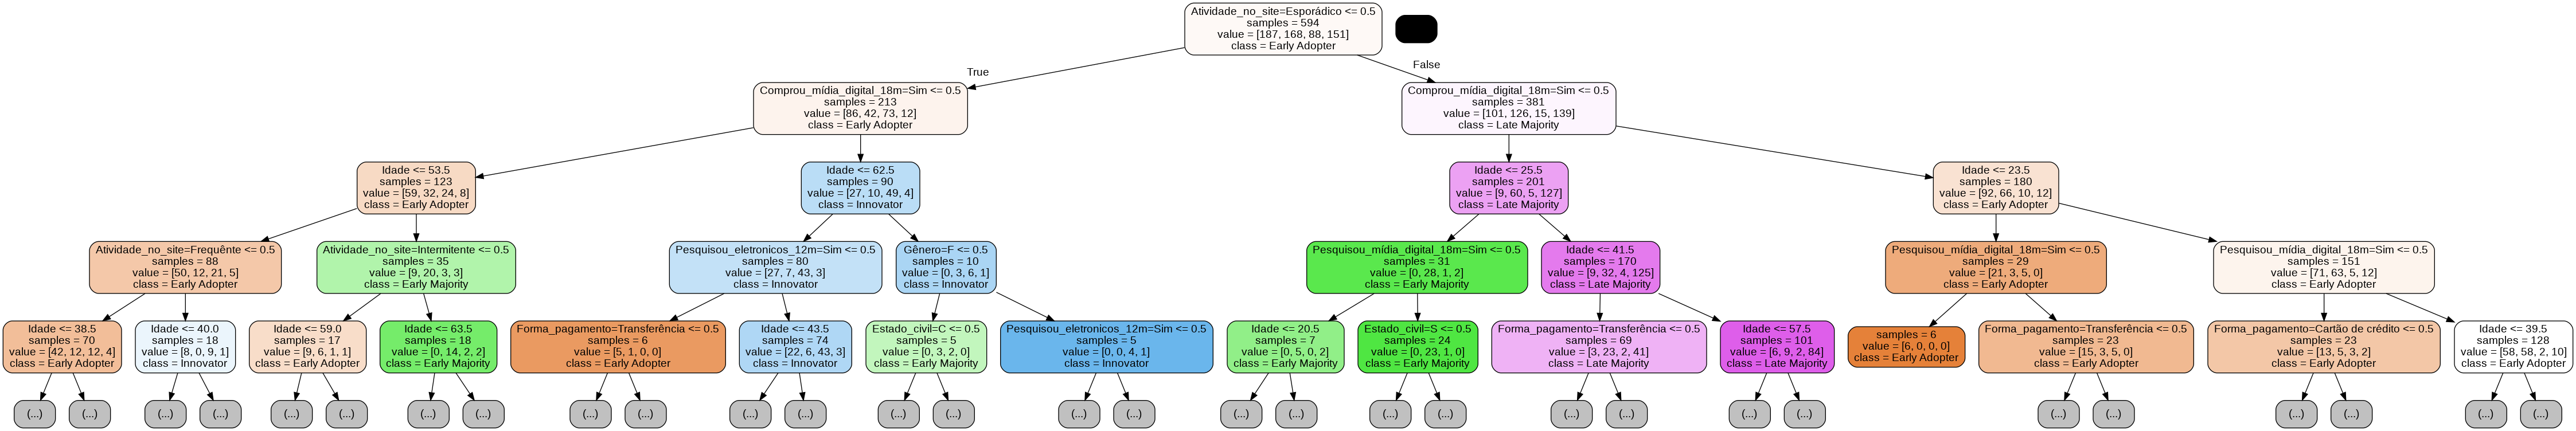

In [65]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(treeConsumer, out_file=None, 
                                feature_names=vect.feature_names_,  
                                rounded =True,
                                filled=True,
                                max_depth= 4 , #Limitamos a 4 para melhor visualização.
                                #min_samples_leaf =4,
                                #min_samples_split = 2,
                                impurity=False,  # Adicionamos o atributo impurity para remover as impurezas de cada nó.
                               
                                class_names=le.classes_)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())